# SMD Übungszettel Nr. 4

__Abagbe von: Pape, Kusurmann, Becker__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.linalg
np.random.seed(8)

## Aufgabe Nr. 10

In [2]:
def two_d_gauss(x, y, mu_x, mu_y, sigma_x, sigma_y, cov):
    u_x = (x - mu_x) / sigma_x
    u_y = (y - mu_y) / sigma_y
    rho = cov / (sigma_x * sigma_y)
    nomination = 2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2)
    return 1/nomination * np.exp( (-1 / (2 * (1 - rho**2))) * ( u_x**2 + u_y**2 - 2*rho*u_x*u_y) )

In [3]:
def bedingt_gauss(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
    N = np.sqrt(2 * np.pi * mu_y * np.sqrt(1 - rho**2))
    u_y = (y - mu_y) / sigma_y
    u_x = (x - mu_x) / sigma_x
    return 1/nomination * np.exp( (-1 / (2 * (1 - rho**2))) * ( u_x**2 + u_y**2 - 2*rho*u_x*u_y) )

In [4]:
# properties of PDF 0
mux_0 = 0
muy_0 = 3 
sigmax_0 = 3.5
sigmay_0 = 2.6
rho_0 = 0.9

cov_0 = rho_0 * sigmax_0 * sigmay_0

cov_matrix_0 = np.array( [[sigmax_0**2, cov_0], [cov_0, sigmay_0**2]])

In [27]:
# propoerties of PDF 1
mux_1 = 6
sigmax_1 = 3.5

a = -0.5
b = 0.6

muy_1 = a + b * mux_1

sigmay_1 = np.sqrt(1 + b**2 * sigmax_1**2)
print(sigmay_1)
rho_1 = b * sigmax_1/sigmay_1

cov_1 = rho_1 * sigmax_1 * sigmay_1

cov_matrix_1 = np.array( [[sigmax_1**2, cov_1], [cov_1, sigmay_1**2]])

2.3259406699226015


In [6]:
popux_0, popuy_0 = np.random.multivariate_normal(mean=np.array([mux_0, muy_0]), 
                                                 cov=cov_matrix_0, size=15000).T
popux_1, popuy_1 = np.random.multivariate_normal(mean=np.array([mux_1, muy_1]), 
                                                 cov=cov_matrix_1, size=15000).T

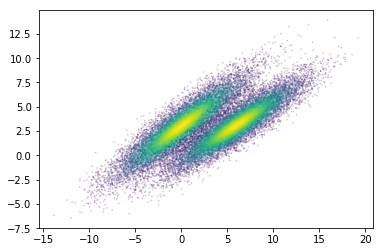

In [357]:
plt.scatter(popux_0, popuy_0, c=two_d_gauss(popux_0, popuy_0, mux_0, 
                                            muy_0, sigmax_0, sigmay_0, cov_0), 
            alpha=0.2, s=0.5)
plt.scatter(popux_1, popuy_1, c=two_d_gauss(popux_1, popuy_1, mux_1, muy_1, 
                                            sigmax_1, sigmay_1, cov_1),
            alpha=0.2, s=0.5)

Stichproben Ergebnisse für die Population 0

In [8]:
# Population 0
stich_mux_0 = 1/len(popux_0) * np.sum(popux_0)
stich_muy_0 = 1/len(popuy_0) * np.sum(popuy_0)

stich_varx_0 = 1/len(popux_0) * np.sum((popux_0 - stich_mux_0)**2)
stich_vary_0 = 1/len(popuy_0) * np.sum((popuy_0 - stich_muy_0)**2)

print(' --- Ergebnisse ---')
print(f'Stichproben Mittelwert x: {stich_mux_0: .2}')
print(f'Stichproben Mittelwert y: {stich_muy_0: .2}')
print(f'Stichproben Sigma x: {np.sqrt(stich_varx_0): .2}')  
print(f'Stichproben Sigma y: {np.sqrt(stich_vary_0): .2}')

 --- Ergebnisse ---
Stichproben Mittelwert x: -0.0037
Stichproben Mittelwert y:  3.0
Stichproben Sigma x:  3.5
Stichproben Sigma y:  2.6


Stichproben Ergebnisse für Population 1

In [9]:
# Population 1
stich_mux_1 = 1/len(popux_1) * np.sum(popux_1)
stich_muy_1 = 1/len(popuy_1) * np.sum(popuy_1)

stich_varx_1 = 1/len(popux_1) * np.sum((popux_1 - stich_mux_1)**2)
stich_vary_1 = 1/len(popuy_1) * np.sum((popuy_1 - stich_muy_1)**2)


print(' --- Ergebnisse ---')
print(f'Stichproben Mittelwert x: {stich_mux_1: .2}')
print(f'Stichproben Mittelwert y: {stich_muy_1: .2}')
print(f'Stichproben Sigma x: {np.sqrt(stich_varx_1): .2}')  
print(f'Stichproben Sigma y: {np.sqrt(stich_vary_1): .2}')

 --- Ergebnisse ---
Stichproben Mittelwert x:  6.0
Stichproben Mittelwert y:  3.1
Stichproben Sigma x:  3.5
Stichproben Sigma y:  2.3


Stichproben Ergebnisse für beide Populationen zusammen

In [10]:
popux_01 = np.append(popux_0, popux_1)
popuy_01 = np.append(popuy_0, popuy_1)

stich_mux_01 = 1/len(popux_01) * np.sum(popux_01)
stich_muy_01 = 1/len(popuy_01) * np.sum(popuy_01)

stich_varx_01 = 1/len(popux_01) * np.sum((popux_01 - stich_mux_01)**2)
stich_vary_01 = 1/len(popuy_01) * np.sum((popuy_01 - stich_muy_01)**2)


print(' --- Ergebnisse ---')
print(f'Stichproben Mittelwert x: {stich_mux_01: .2}')
print(f'Stichproben Mittelwert y: {stich_muy_01: .2}')
print(f'Stichproben Sigma x: {np.sqrt(stich_varx_01): .2}')  
print(f'Stichproben Sigma y: {np.sqrt(stich_vary_01): .2}')

 --- Ergebnisse ---
Stichproben Mittelwert x:  3.0
Stichproben Mittelwert y:  3.0
Stichproben Sigma x:  4.6
Stichproben Sigma y:  2.5


### Aufgabenteil d)

In [348]:
df_0 = pd.DataFrame({'x_0':popux_0, 'y_0': popuy_0})
df_1 = pd.DataFrame({'x_1':popux_1, 'y_1': popuy_1})

popux_0_1000, popuy_0_1000 = np.random.multivariate_normal(mean=np.array([mux_0, muy_0]), 
                                                           cov=cov_matrix_0, size=1000).T
df_0_1000 = pd.DataFrame({'x': popux_0_1000, 'y': popuy_0_1000})

In [12]:
plt.clf()

<Figure size 432x288 with 0 Axes>

## Aufgabe Nr. 11

In [44]:
# Population 1 
pop_1 = np.array([[1, 2, 3/2, 2, 2, 3],
                  [1, 1, 2, 2, 3, 3]])


# Popluation 2
pop_2 = np.array([[3/2, 5/2, 7/2, 5/2, 7/2, 9/2],
                  [1, 1, 1, 2, 2, 2]])


In [45]:
mean_pop_1 = np.mean(pop_1, axis=1)
mean_pop_2 = np.mean(pop_2, axis=1)

print(f'Der Mittelwertvektor für Population 1 lautet: {mean_pop_1} (x y).')
print(f'Der Mittelwertvektor für Population 2 lautet: {mean_pop_2} (x y).')

Der Mittelwertvektor für Population 1 lautet: [1.91666667 2.        ] (x y).
Der Mittelwertvektor für Population 2 lautet: [3.  1.5] (x y).


In [46]:
def scattering_matrix(population):
    mean_pop = np.mean(population, axis=1)
    new_vec = (population.T - mean_pop).T
    matrix_sum = np.matrix([[0, 0], [0, 0]])
    for i in range(len(population[0])):
        matrix_sum = matrix_sum +  np.matrix( new_vec.T[i].reshape(2, 1) * new_vec.T[i] )
    
    return matrix_sum , mean_pop   

In [47]:
S_1, mu_1 = scattering_matrix(pop_1)
S_2, mu_2 = scattering_matrix(pop_2)

S_w = np.array(S_1 + S_2)
print('Die Streumatrix S_1 lautet: \n', S_1, '\n')
print('Die Streumatrix S_2 lautet: \n', S_2, '\n')
print('Die Gesamtstreumatrix S_w ist: \n', S_w)

Die Streumatrix S_1 lautet: 
 [[2.20833333 2.        ]
 [2.         4.        ]] 

Die Streumatrix S_2 lautet: 
 [[5.5 1.5]
 [1.5 1.5]] 

Die Gesamtstreumatrix S_w ist: 
 [[7.70833333 3.5       ]
 [3.5        5.5       ]]


### Aufgabenteil b)

In [124]:
print(scipy.linalg.inv(S_w))
lambdar = np.dot(scipy.linalg.inv(S_w), mean_pop_1 - mean_pop_2) 
lambdar = lambdar * 1 / (np.linalg.norm(lambdar))
print('Lambdar ist gegeben als: \n', lambdar )

[[ 0.18244644 -0.11610228]
 [-0.11610228  0.25570145]]
Lambdar ist gegeben als: 
 [-0.70997922  0.70422263]


In [125]:
t = np.linspace(-2, 2, 10)
lambdar_x = t * lambdar[0] 
lambdar_y = t * lambdar[1] 


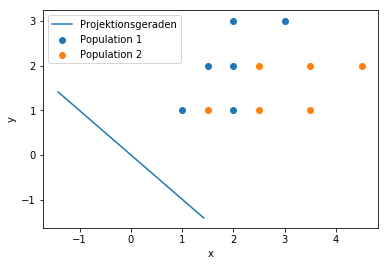

In [126]:
plt.scatter(pop_1[0], pop_1[1], label='Population 1')
plt.scatter(pop_2[0], pop_2[1], label='Population 2')
plt.plot(lambdar_x, lambdar_y, label='Projektionsgeraden')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()


### Aufgabenteil d)

In [127]:
def projection(population, v, cutoff=1):
      return np.dot(v, population)

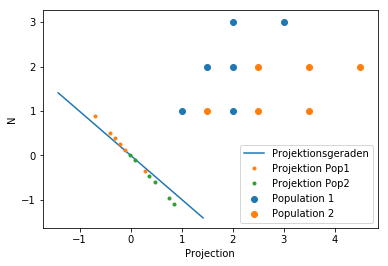

In [379]:
proj_1 = projection(pop_1, lambdar)
proj_2 = projection(pop_2, lambdar)


#plt.hist(proj_1, label='Population 1', alpha = 0.5);
#plt.hist(proj_2, label='Population 2',  alpha = 0.5);

plt.plot(lambdar_x, lambdar_y, label='Projektionsgeraden')
plt.scatter(pop_1[0], pop_1[1], label='Population 1')
plt.scatter(pop_2[0], pop_2[1], label='Population 2')
plt.plot(proj_1 *lambdar[0], proj_1 *lambdar[1],'.', label='Projektion Pop1')
plt.plot(proj_2 *lambdar[0], proj_2 *lambdar[1],'.', label='Projektion Pop2')


#plt.xlim(-1, 4)
#plt.ylim(-1, 4)
plt.xlabel('Projection')
plt.ylabel('N')
plt.legend()

### Aufgabenteil e)

Die beste Trennung ergibt sich für $\lambda_\mathrm{cutoff}=-0.3$. 
Die Effizien und Reinheit ist gegeben durch:

In [91]:
tp = 5
fp = 1
fn = 0

E = tp / (tp + fp)
R = tp / (fn + tp)

print(f'Effizienz: {E:.2}')
print(f'Reinheit: {R:.2}')

Effizienz: 0.83
Reinheit: 1.0


## Aufgabe Nr. 12

Lese die `.HDF5` Datei ein.

In [380]:
df_P_0 = pd.read_hdf('./zwei_populationen.h5', key='P_0_10000')
df_P_1 = pd.read_hdf('./zwei_populationen.h5', key='P_1')


Bezeichne im Folgenden die Population `P_0_10000` als `P_0`

### Aufgabenteil a)

In [233]:
mu_P_0 = df_P_0.mean()
mu_P_1 = df_P_1.mean()

print('Mittelwert der Population P_0')
print(mu_P_0)
print('\n','----' * 10, '\n')
print('Mittelwert der Population P_1')
print(mu_P_1)

Mittelwert der Population P_0
x   -0.027431
y    2.979945
dtype: float64

 ---------------------------------------- 

Mittelwert der Population P_1
x    5.986448
y    3.085283
dtype: float64


### Aufgabenteil b)


In [235]:
cov_P_0 = df_P_0.cov()

cov_P_1 = df_P_1.cov()

cov_P_01 = cov_P_0 + cov_P_1

print('Kovarianzmatrix der Population P_0')
print(cov_P_0)
print('\n','----' * 10, '\n')
print('Kovarianzmatrix der Population P_1')
print(cov_P_1)
print('\n','----' * 10, '\n')
print('Kombinierte Kovarianzmatrix')
print(cov_P_01)

Kovarianzmatrix der Population P_0
           x         y
x  12.208929  8.158410
y   8.158410  6.722863

 ---------------------------------------- 

Kovarianzmatrix der Population P_1
           x         y
x  12.352185  7.410756
y   7.410756  5.477315

 ---------------------------------------- 

Kombinierte Kovarianzmatrix
           x          y
x  24.561114  15.569166
y  15.569166  12.200178


### Aufgabenteil c)

In [243]:
lambdar = np.dot(scipy.linalg.inv(cov_P_01), mu_P_0 - mu_P_1) 
betrag_lambdar = np.linalg.norm(lambdar_1)

lambdar *= 1/betrag_lambdar
print(lambdar)

[-0.61886608  0.78549652]


Damit ergeben sich die beiden Geradengleichungen:

In [248]:
print(f'Geradengeleichung: {betrag_lambdar:.2}  * {lambdar}')

Geradengeleichung: 2.0  * [-0.61886608  0.78549652]


### Aufgabenteil d)

In [282]:
proj_pop_0 = projection(np.array(df_P_0).T, lambdar)
print(proj_pop_0)
proj_pop_1 = projection(np.array(df_P_1).T, lambdar)

[3.11074766 2.53053899 2.60300656 ... 1.62518466 3.51116254 2.0816088 ]


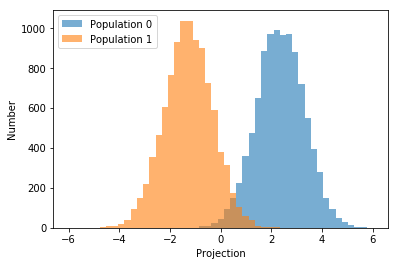

In [251]:
plt.hist(proj_pop_0, alpha=0.6, label='Population 0', bins=np.linspace(-6, 6, 50));
plt.hist(proj_pop_1, alpha=0.6, label='Population 1', bins=np.linspace(-6, 6, 50));

plt.xlabel('Projection')
plt.ylabel('Number')
plt.legend()

Definiere eine Funktion um die Effizienz und Reinheit zu berechnen. Die zugehörigen
Formeln hatte ich oben schon angegeben.

In [288]:
def efficency_pureness(population1, population2, lambdar_cut):
    
    tp = len( population1[population1 >= lambdar_cut])
    fp = len(population1[population1 < lambdar_cut])
    fn = len(population2[population2 > lambdar_cut])
    
    try:
        efficency = tp / (tp + fp)
    except ZeroDivisionError:
        efficency =  None
    
    try:
        pureness = tp / (fn + tp)
    except ZeroDivisionError:
        pureness = None
        
        
    return efficency, pureness   

Bestimme die Werte für verschiedene $\lambda_\mathrm{cut}$. Zusätzlich werden die 
Werte für die nächsten beiden Aufgabenteilen mitberechnet.

In [330]:
lambda_cut = np.linspace(-6, 6, 1e3)
efficencies = []
purness = []
signal_to_noise_list = []
significance_list = []

for i in lambda_cut:
    # check the size of the signal and noise, for the given lambda_cut
    signal = len(proj_pop_0[proj_pop_0 >= i])
    rauschen = len(proj_pop_1[proj_pop_1 >= i])
    
    # calculate signal_to_noise_ration
    try:
        signal_to_noise = signal / rauschen
    except ZeroDivisionError:
        signal_to_noise = None
    
    # calculate the significance
    try: 
        significance = signal / np.sqrt(signal + rauschen)
    except ZeroDivisionError:
        significance = None
    
    # calculate the efficency and purness of the two population for the 
    # given lambda_cut
    
    E, R = efficency_pureness(proj_pop_0, proj_pop_1, i)
    
    # append everything to the a list
    efficencies.append(E)
    purness.append(R)
    signal_to_noise_list.append(signal_to_noise)
    significance_list.append(significance)

/home/beckstev/.local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


Wähle $\lambda_\mathrm{cut}$ so das die Reinheit etwa eins ist. 

In [331]:
lambda_cut_best = lambda_cut[ 1- np.array(purness) <  0.01][0]
print(f'Gewählter Schnittwert: {lambda_cut_best:.2}')

Gewählter Schnittwert: 0.94


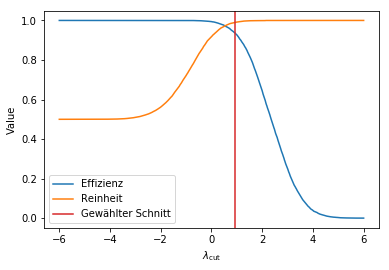

In [332]:
plt.plot(lambda_cut, efficencies, label='Effizienz')
plt.plot(lambda_cut, purness, label='Reinheit')

plt.axvline(lambda_cut_best, color='C3', label='Gewählter Schnitt')
plt.xlabel(r'$\lambda_\mathrm{cut}$')
plt.ylabel('Value')
plt.legend()

### Aufgabenteil f)

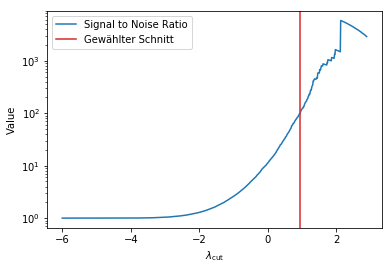

In [338]:
plt.plot(lambda_cut, signal_to_noise_list, label='Signal to Noise Ratio')
plt.axvline(lambda_cut_best, color='C3', label='Gewählter Schnitt')
plt.yscale('log')
plt.ylabel('Value')
plt.xlabel(r'$\lambda_\mathrm{cut}$');
plt.legend()

### Aufgabenteil g)

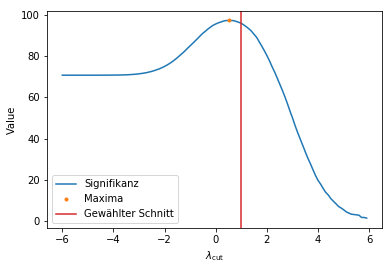

In [280]:
plt.plot(lambda_cut, significance_list, label='Signifikanz')
plt.plot(lambda_cut[significance_list == max(significance_list)],
         max(significance_list), '.', label='Maxima')
plt.axvline(lambda_cut_best, color='C3', label='Gewählter Schnitt')

plt.ylabel('Value')
plt.xlabel(r'$\lambda_\mathrm{cut}$')
plt.legend()

lambda_most_significanct = lambda_cut[significance_list == max(significance_list)]

In [279]:
print(f'Die maximale Signifikanz liegt bei {lambda_most_significanct[0]:.2} ')

Die maximale Signifikanz liegt bei 0.5 


### Aufgabenteil h